## Importing 

In [60]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Getting the Image

In [61]:
img=cv.imread("C:\\Users\\kulka\\OneDrive\\Pictures\\wallpaperflare.com_wallpaper.jpg", cv.IMREAD_COLOR)

In [62]:
print(img.shape)

(1080, 1920, 3)


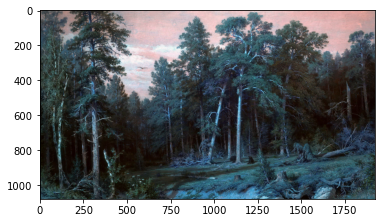

In [63]:
plt.imshow(img)

## Extracting the RGB components 

In [64]:
r=np.zeros((1080,1920), dtype=int)
g=np.zeros((1080,1920), dtype=int)
b=np.zeros((1080,1920), dtype=int)
for i in range(len(img)):
    for j in range(len(img[0])):
        r[i][j]=img[i][j][2]
        g[i][j]=img[i][j][1]
        b[i][j]=img[i][j][0]
        


## Gaussian blur

In [65]:
blur=np.array([[0,0,1,2,1,0,0],[0,3,13,22,13,3,0],[1,13,59,97,59,13,1],[2,22,97,159,97,22,2],[1,13,59,97,59,13,1],[0,3,13,22,13,3,0],[0,0,1,2,1,0,0]])
div=1003
for i in range(4, len(img)-4):
    for j in range(4, len(img[0])-4):
        sr=i-4
        sc=j-4
        curr=curg=curb=0
        for k in range(0,7):
            for l in range(0,7):
                curr+=(r[sr+k][sc+l]*blur[k][l])
                curg+=(g[sr+k][sc+l]*blur[k][l])
                curb+=(b[sr+k][sc+l]*blur[k][l])
        curr=curr//div
        curg=curg//div
        curb=curb//div
        r[i][j]=curr
        g[i][j]=curg
        b[i][j]=curb
        
    
r=r[4:len(img)-4][4:len(img[0]-4)]
g=g[4:len(img)-4][4:len(img[0]-4)]
b=b[4:len(img)-4][4:len(img[0]-4)]

## Writing into a new JPG file

In [66]:
newimg=np.zeros((len(r),len(r[0]),3),dtype=int)
for i in range(len(newimg)):
    for j in range(len(newimg[0])):
        newimg[i][j][2]=r[i][j]
        newimg[i][j][1]=g[i][j]
        newimg[i][j][0]=b[i][j]
cv.imwrite("C:\\Users\\kulka\\OneDrive\\Pictures\\blur.jpg", newimg)

True

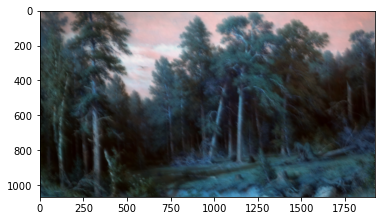

In [67]:
plt.imshow(newimg)